# Quotients $(\mathbb{S}^{2}\times\mathbb{S}^{1})/\mathbb{Z}_{2}$ As Circle Bundles Over $\mathbb{RP}^{2}$ 

Consider the trivial circle bundle over $\mathbb{S}^{2}$ defined by the projection of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ onto the first factor.  We define three quotient metrics on $\mathbb{S}^{2}\times\mathbb{S}^{1}$ corresponding to three different $\mathbb{Z}_{2}$-actions covering the antipodal map on $\mathbb{S}^{2}$:

$\textbf{1.}$ $(v,z)\cdot (-1) := (-v,z)$

$\textbf{2.}$ $(v,z)\cdot (-1) := (-v,-z)$

$\textbf{3.}$ $(v,z)\cdot (-1) := (-v,\bar{z})$

In each case, we obtain an induced circle bundle over $\mathbb{RP}^{2}$.  The quotient induced by $\textbf{1}$ above yields the trivial bundle; $\textbf{2}$ yields the (unique) non-trivial orientable circle bundle over $\mathbb{RP}^{2}$, and $\textbf{3}$ yields the non-orientable circle bundle over $\mathbb{RP}^{2}$ with (twisted) Euler number 0.   

In [1]:
# ============================================================
# Core scientific stack
# ============================================================
import numpy as np
import matplotlib.pyplot as plt

import circle_bundles as cb
import circle_bundles.synthetic as sy


First, generate a sample of the product $\mathbb{S}^{2}\times\mathbb{S}^{1}$ as vectors in $\mathbb{R}^{5}$:

In [2]:
n_samples = 10000
sigma = 0.05  #noise level

data, base_points, angles = sy.sample_s2_trivial(
    n_points = n_samples,
    sigma = sigma,
    radius_clip = (0.0, 5.0),
)

Next, construct a cover of $\mathbb{RP}^{2}$ using nearly-equidistant landmark points (see reference section for details):

### Cover And Nerve Summary
- $n_\text{sets} = 80$, $n_\text{samples} = 10000$

**Recorded Simplex Counts:**

- $\#(\text{0-simplices}) = 80$
- $\#(\text{1-simplices}) = 237$
- $\#(\text{2-simplices}) = 158$
- *No recorded simplices in dimensions* $\ge 3$

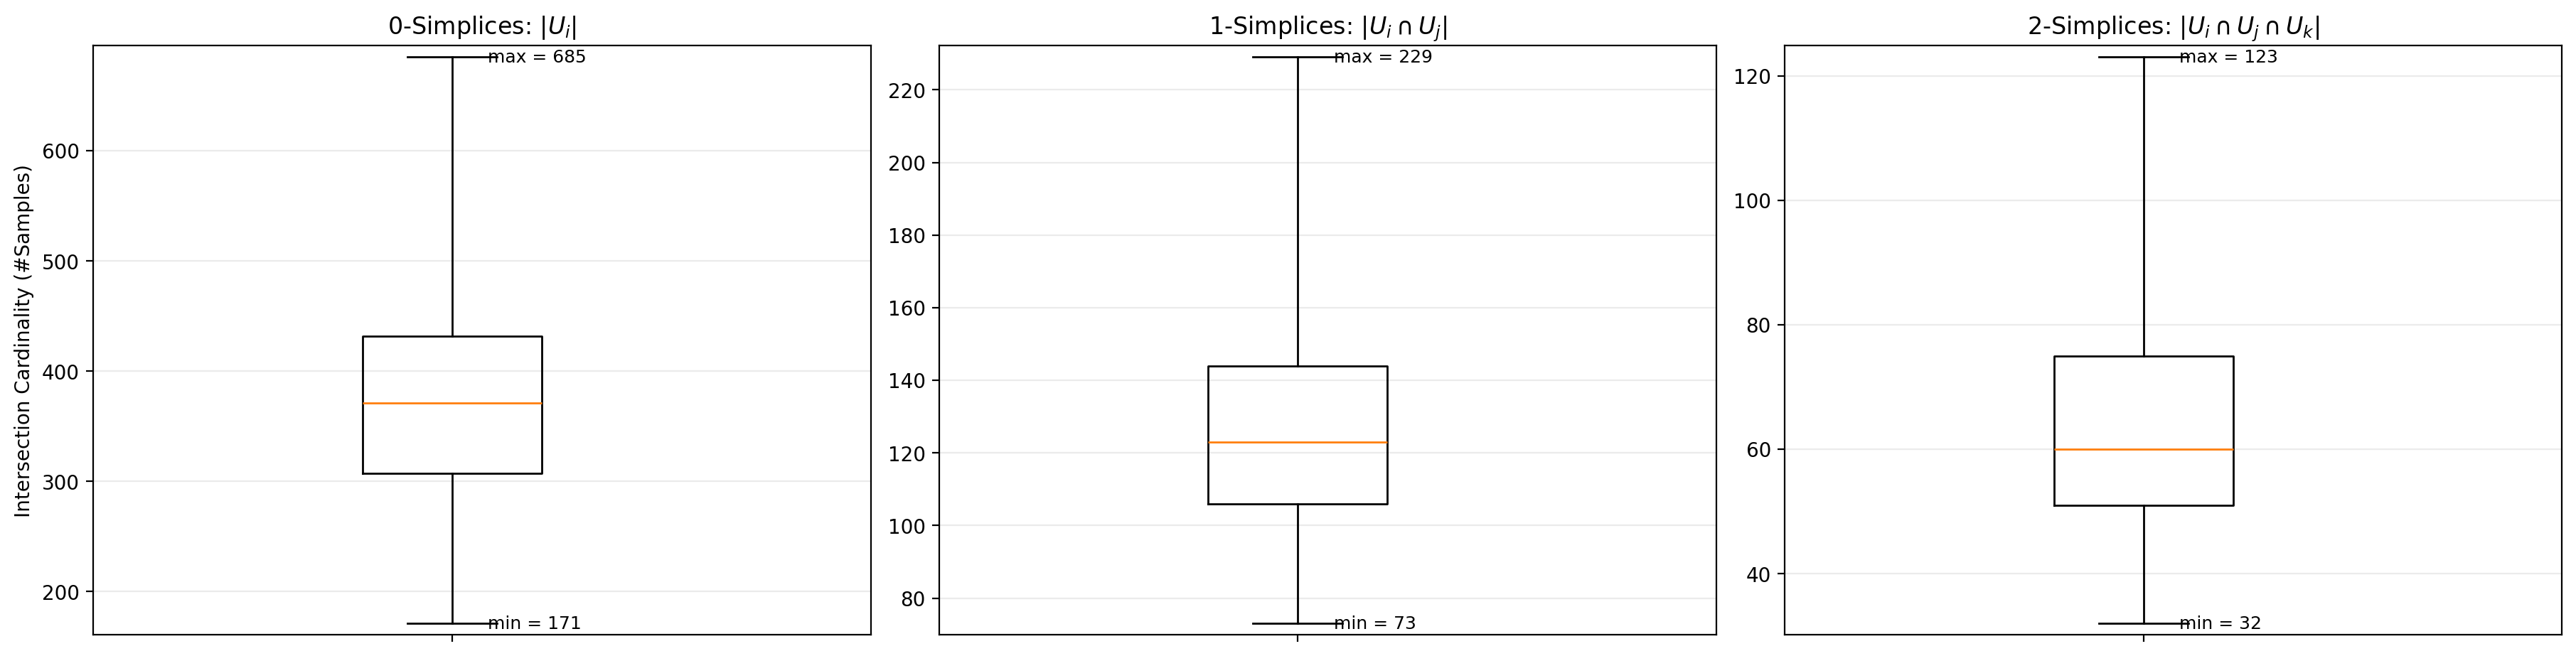

In [3]:
n_landmarks = 80
rp2_cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

Choose a quotient metric for the dataset and construct a bundle

In [4]:
total_metrics = [cb.RP2_TrivialMetric(), cb.RP2_TwistMetric(), cb.RP2_FlipMetric()]  


j = 2   #CHOOSE: a metric on the total space
total_metric = total_metrics[j]


bundle = cb.build_bundle(
    data,
    rp2_cover,
    total_metric = total_metric,
    show=True,
)


<IPython.core.display.Math object>

Below we compute the persistence of each characteristic class representative with respect to the weights filtration of the nerve of our open cover of $\mathbb{RP}^{2}$ (see theory section for details).  We expect an orientable cocycle to become a coboundary after a single edge is removed from the nerve, but a non-orientable cocycle over $\mathbb{RP}^{2}$ may have a much longer 'lifetime.' The restriction of the total space of a non-orientable bundle over $\mathbb{RP}^{2}$ to any 'equator' $\mathbb{RP}^{1}\subset\mathbb{RP}^{2}$ is still non-trivial, so the maximal subcomplex of the nerve on which a representative cocycle restricts to a coboundary cannot have any non-trivial cycles.  

In [5]:
pers = bundle.get_persistence(show = True)


<IPython.core.display.Math object>

Optionally run the cell below to see an interactive visualization of the weights filtration on the nerve of the cover. 

In [6]:
fig = bundle.show_max_trivial(show_labels = False)
plt.show()

    'data': [{'hoverinfo': 'none',
              'line': {'color': 'black', 'wid…

# Quotients $\mathbb{S}^{3}/(\mathbb{Z}_{2p}\rtimes\mathbb{Z}_{2})$ As Circle Bundles Over $\mathbb{RP}^{2}$

We combine the ideas from the two experiments above to construct the non-orientable bundles over $\mathbb{RP}^{2}$ which also have non-trivial twisted Euler class. One can show that such bundles are classified up to isomorphism by the absolute values of their twisted Euler numbers. In particular, for any even integer $2p\in \mathbb{Z}$, we define a $\mathbb{Z}_{2p}$-action and a $\mathbb{Z}_{2}$-action on $\mathbb{S}^{3}\subset\mathbb{C}^{2}$ by $(w,z)\cdot m := (w,z)\cdot  e^{2\pi i\left(\frac{m}{2p}\right)}$ and $(w,z)\cdot (-1) = (-w,\bar{z})$. The resulting quotient space has the structure of a non-orientable circle bundle over $\mathbb{RP}^{2}$ with twisted Euler number $\pm p$.  

In [ ]:
# --- Generate a sample of s3 ---

n_samples = 10000
s3_data = cb.sample_sphere(n = n_samples, dim = 3)

v = np.array([1.0, 0.0, 0.0]) 
base_points = cb.hopf_projection(s3_data, v= v)

print(f'Generated {n_samples} samples from S3.')

In [ ]:
# --- Construct an open cover of rp2 ---

n_landmarks = 80
rp2_cover = cb.make_rp2_fibonacci_star_cover(base_points, n_pairs = n_landmarks)
rp2_summ = rp2_cover.summarize(plot = True)

In [ ]:
# --- Compute local trivializations and characteristic classes using a quotient metric on s3 ---

p = 3  #CHOOSE: a p-value for the quotient metric


total_metric = s3_quotient_metric(p = 2*p, v_axis = v, antipodal = True)

bundle = cb.build_bundle(
    s3_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,  #optionally use sparse cc's 
    total_metric = total_metric,
    show=True,
)


In [ ]:
#Compute class persistence on the weights filtration of the nerve
pers = bundle.get_persistence(show = True)


Construct a point cloud representation of the metric data using a classifying map to a Grassmann manifold (see [1] for details)

Verify that the point cloud and associated projection map have the same circle bundle classification as the original dataset

In [ ]:
# --- Construct a pullback coordinate bundle object ---

pb_bundle = cb.build_bundle(
    pullback_results.total_data,
    rp2_cover,
#    CircularCoords_cls=CircularCoords,     #OPTION: use Dreimac for circular coordinates
    show=True,
    total_metric = pullback_results.metric 
)
